In [1]:
import time
from datetime import datetime
import vectorbt as vbt
from tqdm import tqdm

import pandas as pd
import pandas_ta as ta
import numpy as np
import mplfinance as mpf

from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('EURUSD_1h.csv')
data.head()

timestamp      open      high       low     close  \
0  2021-11-04 17:00:00+00:00  1.154734  1.155535  1.154734  1.155001   
1  2021-11-04 18:00:00+00:00  1.155135  1.156069  1.155135  1.155668   
2  2021-11-04 19:00:00+00:00  1.155535  1.156203  1.155535  1.156069   
3  2021-11-04 20:00:00+00:00  1.156069  1.156069  1.155535  1.155936   
4  2021-11-04 21:00:00+00:00  1.155802  1.156470  1.155268  1.155802   

   adj close  volumn  
0   1.155001       0  
1   1.155668       0  
2   1.156069       0  
3   1.155936       0  
4   1.155802       0

In [3]:
df = data.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True).dt.tz_localize(None)
df.set_index('timestamp', inplace = True)
df

open      high       low     close  adj close  volumn
timestamp                                                                     
2021-11-04 17:00:00  1.154734  1.155535  1.154734  1.155001   1.155001       0
2021-11-04 18:00:00  1.155135  1.156069  1.155135  1.155668   1.155668       0
2021-11-04 19:00:00  1.155535  1.156203  1.155535  1.156069   1.156069       0
2021-11-04 20:00:00  1.156069  1.156069  1.155535  1.155936   1.155936       0
2021-11-04 21:00:00  1.155802  1.156470  1.155268  1.155802   1.155802       0
...                       ...       ...       ...       ...        ...     ...
2022-08-30 12:00:00  1.002908  1.003714  1.001202  1.001603   1.001603       0
2022-08-30 13:00:00  1.001703  1.004117  1.001603  1.003009   1.003009       0
2022-08-30 14:00:00  1.002104  1.002104  0.998702  0.998901   0.998901       0
2022-08-30 15:00:00  0.999400  1.003512  0.999400  1.002104   1.002104       0
2022-08-30 16:00:00  1.002305  1.003512  1.002004  1.002707   1.002707       0

[5010 rows x 6 columns]

In [4]:
df.ta.cci(length=14, c=0.015, append=True)
df

open      high       low     close  adj close  \
timestamp                                                                
2021-11-04 17:00:00  1.154734  1.155535  1.154734  1.155001   1.155001   
2021-11-04 18:00:00  1.155135  1.156069  1.155135  1.155668   1.155668   
2021-11-04 19:00:00  1.155535  1.156203  1.155535  1.156069   1.156069   
2021-11-04 20:00:00  1.156069  1.156069  1.155535  1.155936   1.155936   
2021-11-04 21:00:00  1.155802  1.156470  1.155268  1.155802   1.155802   
...                       ...       ...       ...       ...        ...   
2022-08-30 12:00:00  1.002908  1.003714  1.001202  1.001603   1.001603   
2022-08-30 13:00:00  1.001703  1.004117  1.001603  1.003009   1.003009   
2022-08-30 14:00:00  1.002104  1.002104  0.998702  0.998901   0.998901   
2022-08-30 15:00:00  0.999400  1.003512  0.999400  1.002104   1.002104   
2022-08-30 16:00:00  1.002305  1.003512  1.002004  1.002707   1.002707   

                     volumn  CCI_14_0.015  
timestamp                                  
2021-11-04 17:00:00       0           NaN  
2021-11-04 18:00:00       0           NaN  
2021-11-04 19:00:00       0           NaN  
2021-11-04 20:00:00       0           NaN  
2021-11-04 21:00:00       0           NaN  
...                     ...           ...  
2022-08-30 12:00:00       0     38.825722  
2022-08-30 13:00:00       0     64.395655  
2022-08-30 14:00:00       0    -68.279118  
2022-08-30 15:00:00       0      4.739894  
2022-08-30 16:00:00       0     48.240171  

[5010 rows x 7 columns]

In [5]:
def cci_plot(df, start, end, cci_length, cci_c):
    df_plot = df.iloc[start: end]
    cci = df_plot['CCI_'+str(cci_length)+'_'+str(cci_c)]

    overbought_line = np.empty(df_plot.shape[0])
    overbought_line.fill(100)
    oversold_line = np.empty(df_plot.shape[0])
    oversold_line.fill(-100)

    cci_plot = mpf.make_addplot(cci, panel=1, color='blue', width=1, ylabel='cci')
    overbought_plot = mpf.make_addplot(overbought_line, panel=1, color='orange', width=0.8, secondary_y=False)
    oversold_plot = mpf.make_addplot(oversold_line, panel=1, color='orange', width=0.8, secondary_y=False)
    result_plots = [cci_plot, oversold_plot, overbought_plot]

    return result_plots

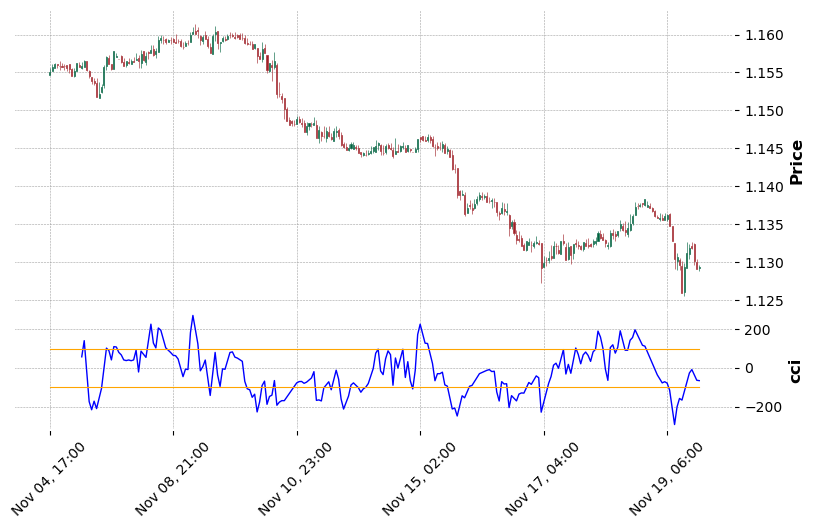

In [6]:
cci_info_plots = cci_plot(df, 0, 264, 14, 0.015)

mpf.plot(df.iloc[0:264], type='candle', style='charles',
         addplot=cci_info_plots,
         figsize=(10, 6))

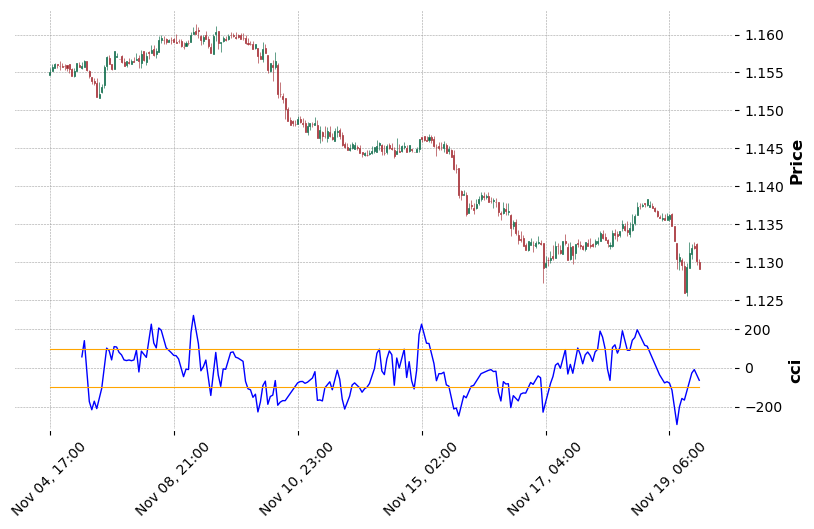

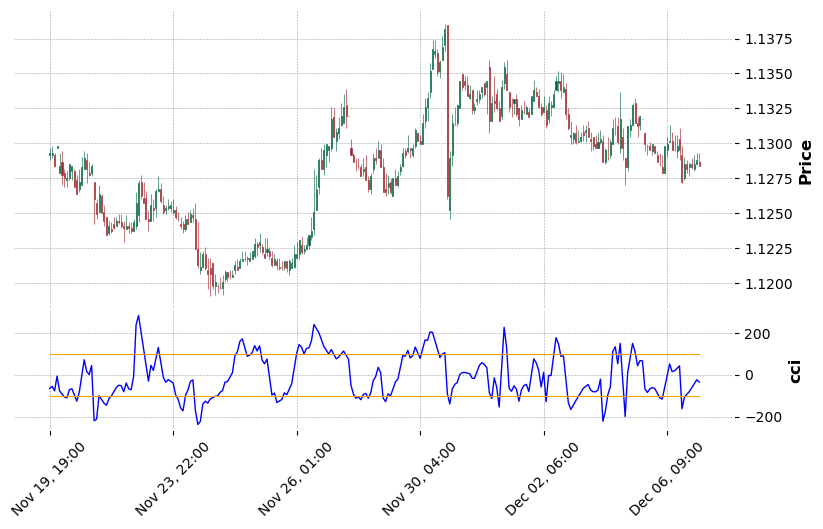

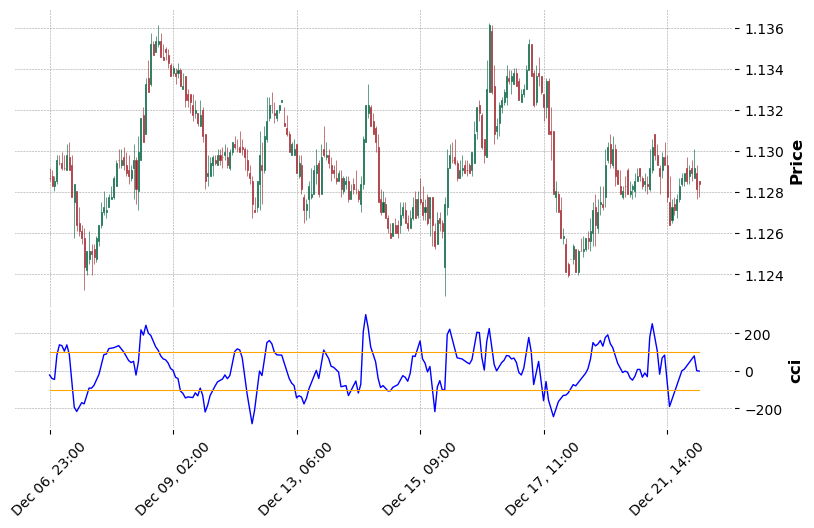

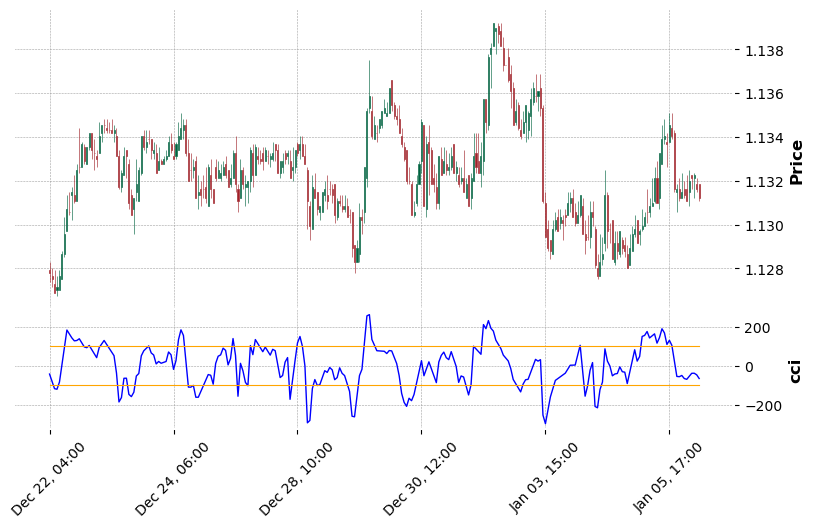

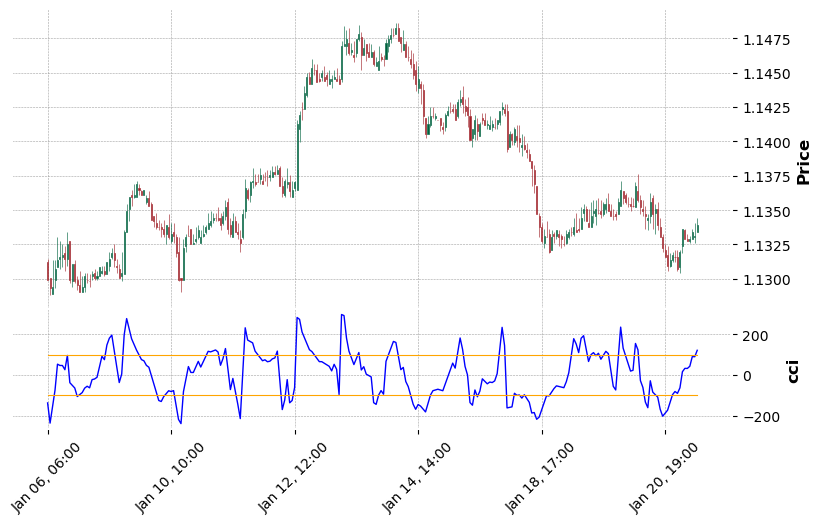

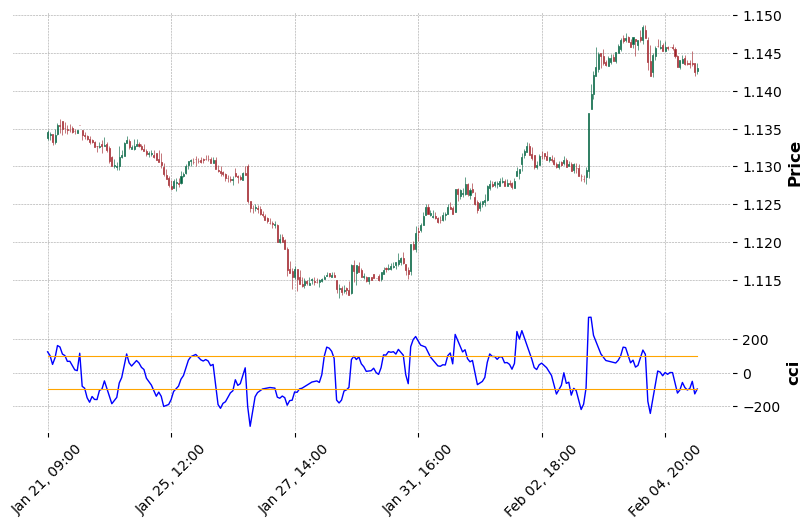

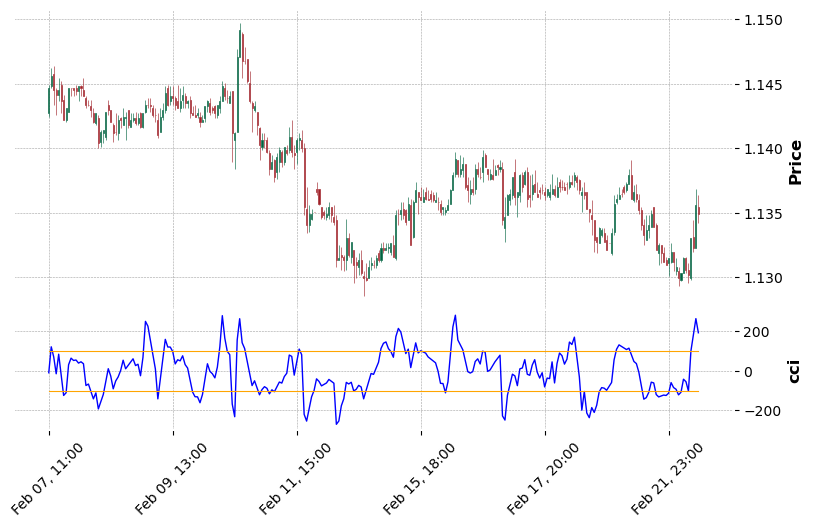

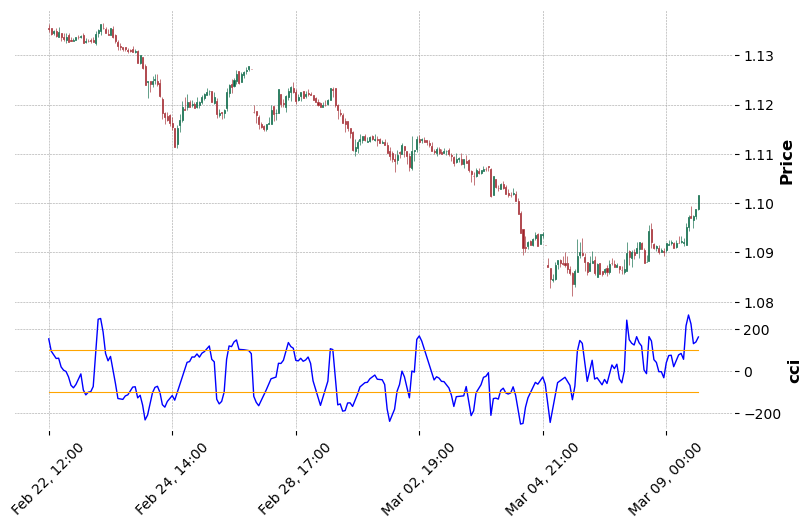

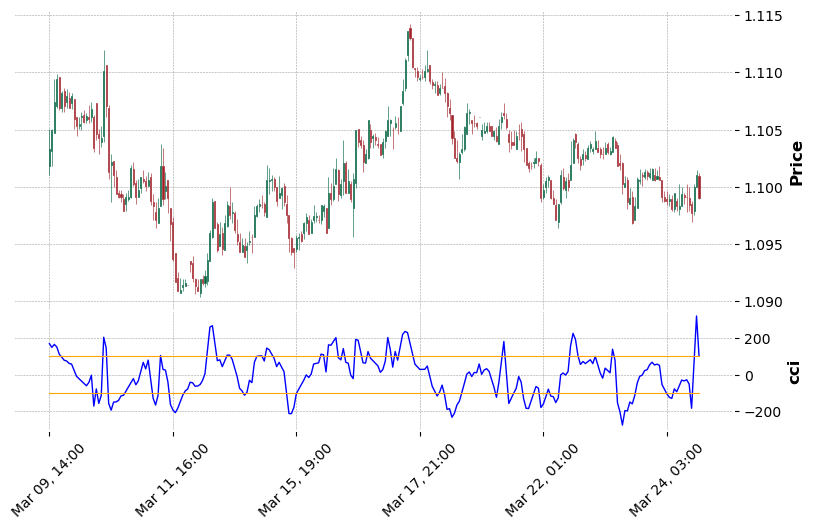

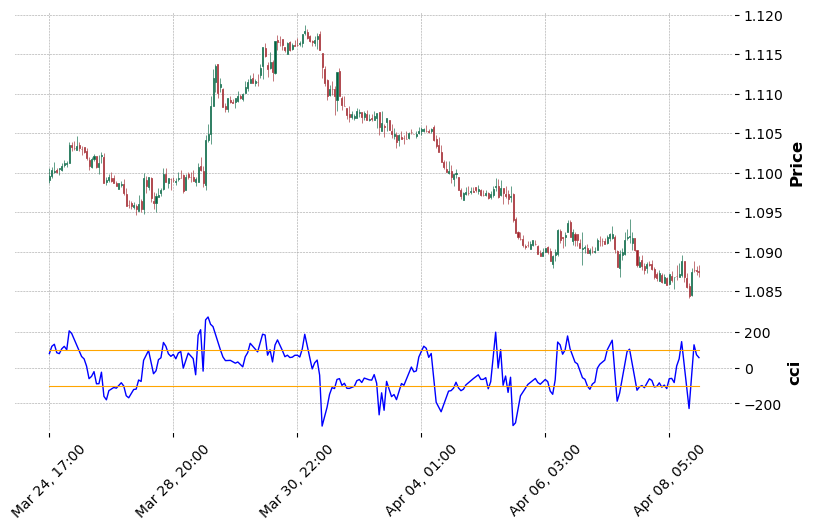

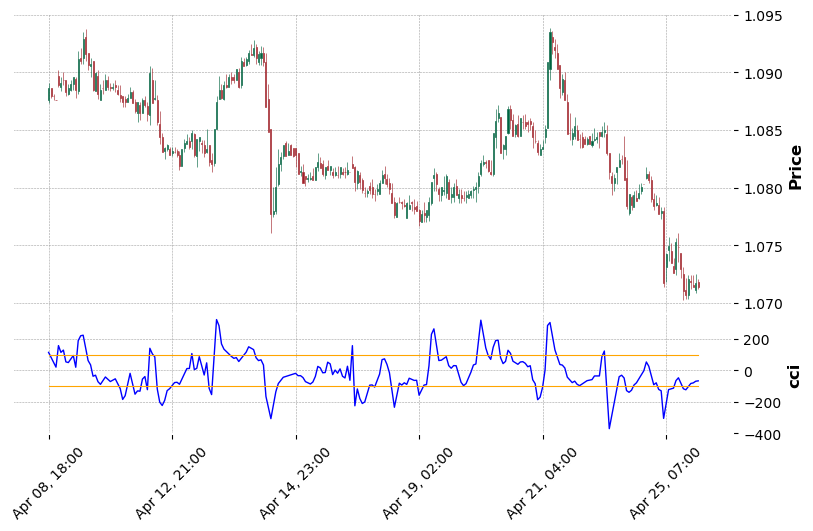

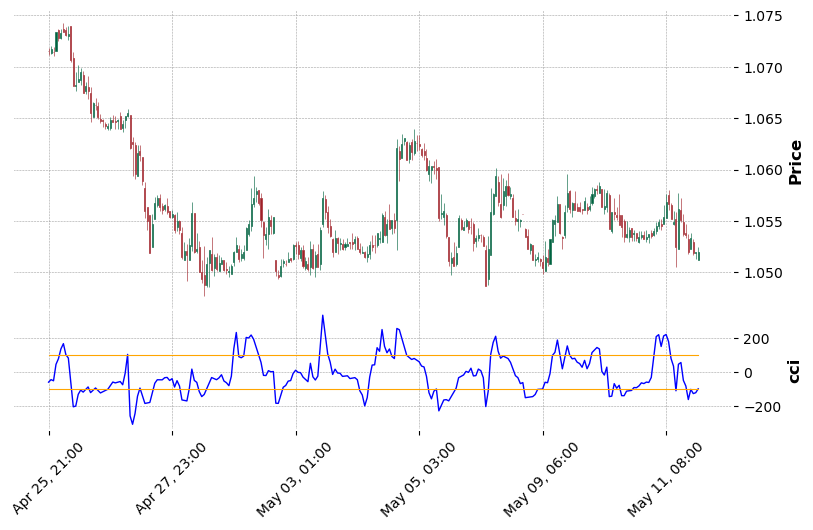

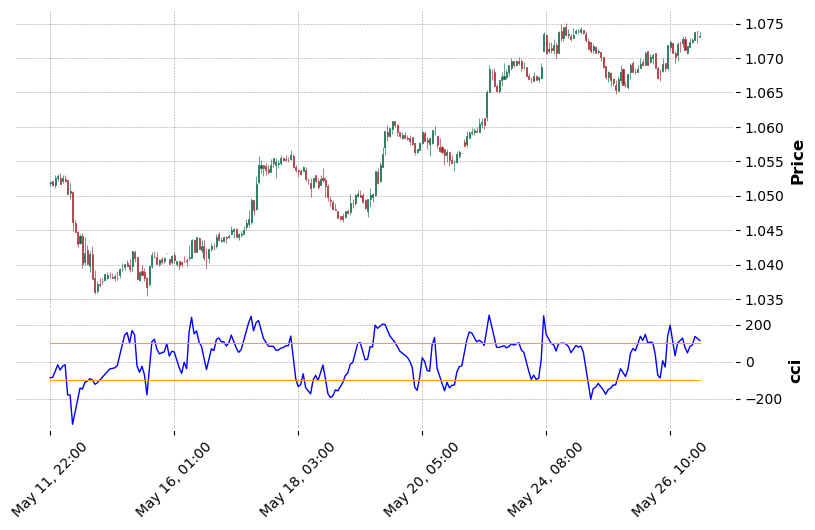

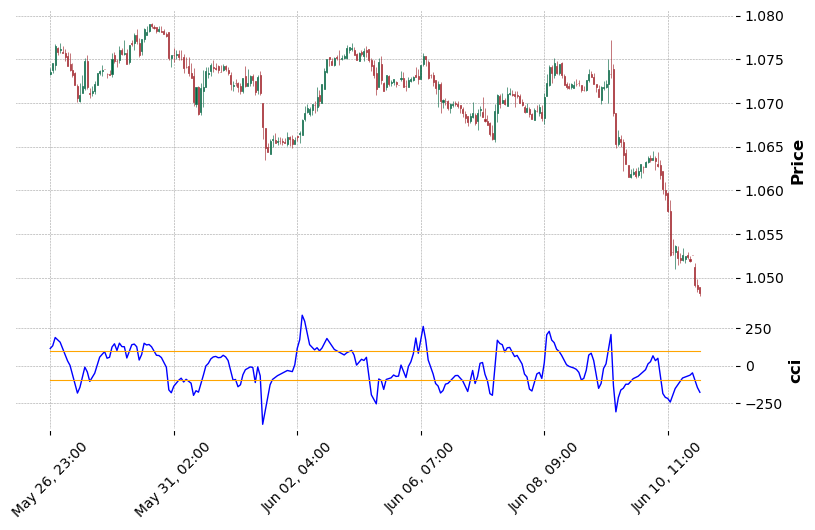

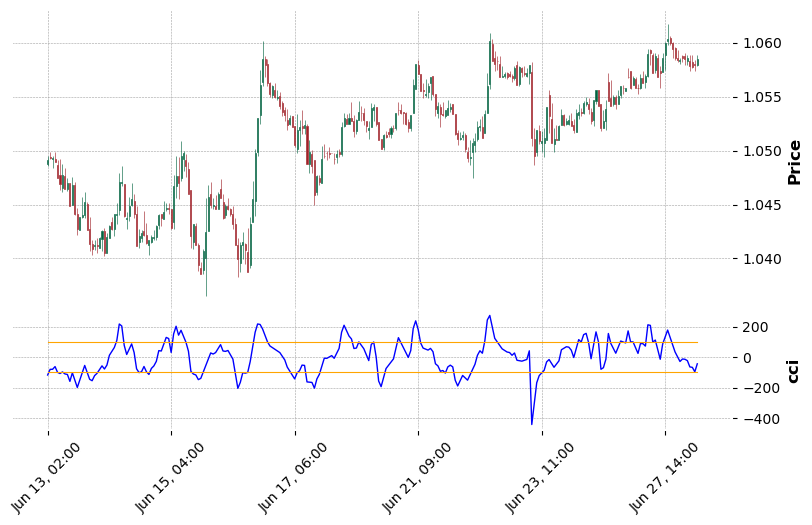

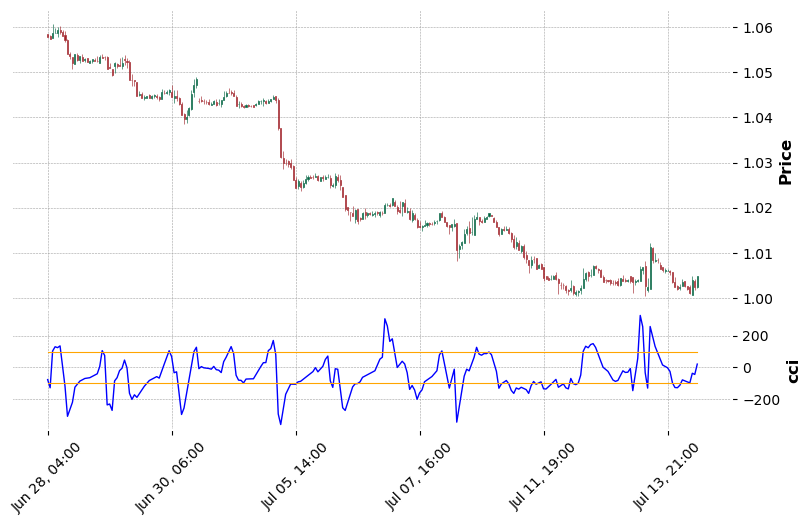

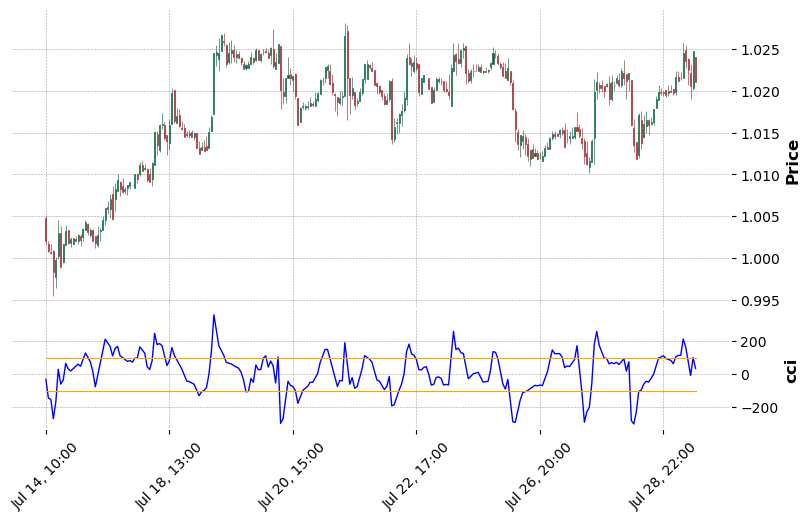

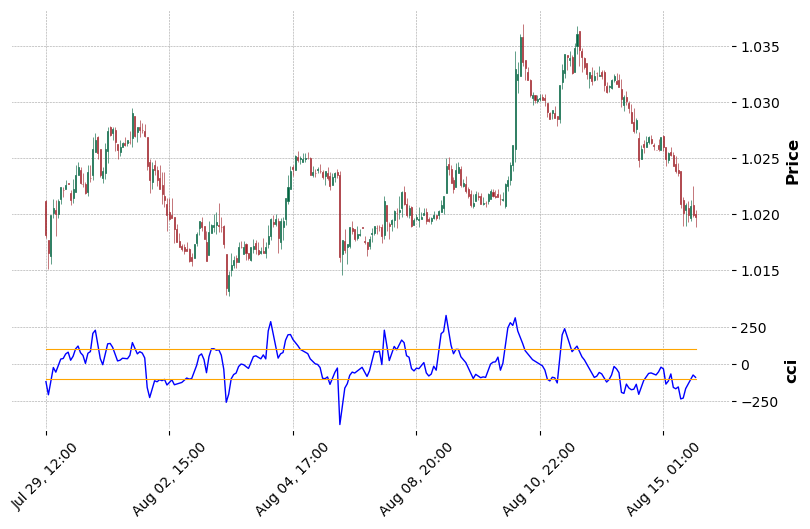

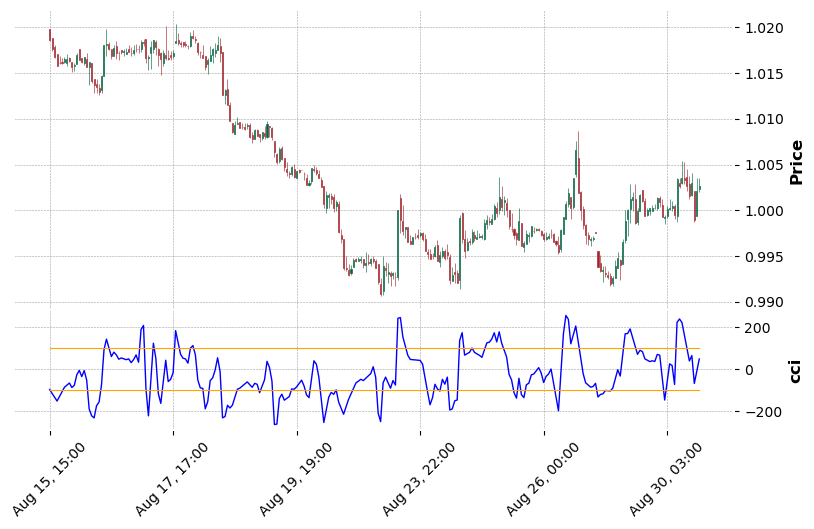

In [9]:
df_windows = np.linspace( 0, len(df), 20 )

for i in range(len(df_windows) - 1):
    start, end = int(df_windows[i]), int(df_windows[i+1])
    cci_info_plots = cci_plot(df, start, end, 14, 0.015)

    mpf.plot(df.iloc[start:end], type='candle', style='charles',
         addplot=cci_info_plots,
         figsize=(10, 6))

In [7]:
def custom_cci(open, high, low, close, 
                cci_length = 14,
                EMA_period = 100) :
    cci_c = 0.015

    vbt_ema = vbt.IndicatorFactory.from_pandas_ta('ema')
    vbt_cci = vbt.IndicatorFactory.from_pandas_ta('cci')
    cci = vbt_cci.run(close=close, low=low, high=high, length=cci_length, c=cci_c)
    ema = vbt_ema.run(close, length=EMA_period)

    cci_df = pd.DataFrame(data=cci.cci.values, columns=['CCI_'+str(cci_length)+'_'+str(cci_c)], index=cci.cci.index)
    ema_df = pd.DataFrame(data=ema.ema.values, columns=['EMA_'+str(EMA_period)], index=ema.ema.index)
    _df = pd.concat([cci_df, ema_df], axis=1)

    _df['prev_cci_'+str(cci_length)+'_'+str(cci_c)] = _df['CCI_'+str(cci_length)+'_'+str(cci_c)].shift(1)
    _df['cci'+str(cci_length)+'crossMidUp'] = (_df['prev_cci_'+str(cci_length)+'_'+str(cci_c)] < 0)&(_df['CCI_'+str(cci_length)+'_'+str(cci_c)] >= 0)
    _df['cci'+str(cci_length)+'crossMidDown'] = (_df['prev_cci_'+str(cci_length)+'_'+str(cci_c)] > 0)&(_df['CCI_'+str(cci_length)+'_'+str(cci_c)] <= 0)

    _df['cci'+str(cci_length)+'overbought'] = (_df['prev_cci_'+str(cci_length)+'_'+str(cci_c)] < 200)&(_df['CCI_'+str(cci_length)+'_'+str(cci_c)] >= 200)
    _df['cci'+str(cci_length)+'oversold'] = (_df['prev_cci_'+str(cci_length)+'_'+str(cci_c)] > -100)&(_df['CCI_'+str(cci_length)+'_'+str(cci_c)] <= -200)
    _df['cci'+str(cci_length)+'overbought_end'] = (_df['prev_cci_'+str(cci_length)+'_'+str(cci_c)] > 200)&(_df['CCI_'+str(cci_length)+'_'+str(cci_c)] <= 200)
    _df['cci'+str(cci_length)+'oversold_end'] = (_df['prev_cci_'+str(cci_length)+'_'+str(cci_c)] < -200)&(_df['CCI_'+str(cci_length)+'_'+str(cci_c)] >= -200)

    _df['entries'] = False
    _df['exits'] = False
    _df['short_entries'] = False
    _df['short_exits'] = False

    _df['low'] = low
    _df['high'] = high

    current_action = 'close'
    total_trade = 0

    # TODO: cross middle line then order and cci cross 200 and cross -200 to close order
    for index, row in _df.iterrows():
        if current_action == 'close':
            if (row['cci'+str(cci_length)+'crossMidUp'] == True) and (row['low'] > row['EMA_'+str(EMA_period)]):
                _df.at[index, 'entries'] = True
                current_action = 'long'
                total_trade = total_trade + 1
                
            elif (row['cci'+str(cci_length)+'crossMidDown'] == True) and (row['high'] < row['EMA_'+str(EMA_period)]):
                _df.at[index, 'short_entries'] = True
                current_action = 'short'
                total_trade = total_trade + 1
            
        elif current_action == 'long':
            if (row['cci'+str(cci_length)+'overbought'] == True) or (row['cci'+str(cci_length)+'crossMidDown'] == True):
                current_action = 'close'
                _df.at[index, 'exits'] = True
                    
        elif current_action == 'short':
            if (row['cci'+str(cci_length)+'oversold'] == True) or (row['cci'+str(cci_length)+'crossMidUp'] == True):
                current_action = 'close'
                _df.at[index, 'short_exits'] = True
    
    if total_trade < 20:
        df['entries'] = False
        _df['exits'] = False
        _df['short_entries'] = False
        _df['short_exits'] = False
    return _df['entries'], _df['exits'], _df['short_entries'], _df['short_exits']
    # return entries, exits

In [8]:
df_test = df.copy()
x, y, a, b = custom_cci(df_test.open, df_test.high, df_test.low, df_test.close, 14, 100)

In [9]:
port = vbt.Portfolio.from_signals(df_test['close'],
                                entries=x, 
                                exits=y,
                                short_entries=a,
                                short_exits=b,
                                fees=0.0002,
                                slippage=0.0002
                                )

In [32]:
port.plot().show()

In [33]:
port.stats()

c:\Users\A715-72G\anaconda3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

c:\Users\A715-72G\anaconda3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

c:\Users\A715-72G\anaconda3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

c:\Users\A715-72G\anaconda3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2021-11-04 17:00:00
End                           2022-08-30 16:00:00
Period                                       5010
Start Value                                 100.0
End Value                               73.785065
Total Return [%]                       -26.214935
Benchmark Return [%]                   -13.185608
Max Gross Exposure [%]                      100.0
Total Fees Paid                         10.638812
Max Drawdown [%]                        26.564641
Max Drawdown Duration                      4753.0
Total Trades                                  307
Total Closed Trades                           307
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                             20.19544
Best Trade [%]                           1.059355
Worst Trade [%]                         -1.014208
Avg Winning Trade [%]                    0.226471
Avg Losing Trade [%]                    -0.181039


In [10]:
Pure_CCI = vbt.IndicatorFactory(class_name='Pure_cci',
                                input_names=['open', 'high', 'low', 'close'],
                                param_names=['cci_length', 'EMA_period'],
                                output_names=['entries', 'exits', 'short_entries', 'short_exits'],
                               ).from_apply_func(custom_cci,
                                                 cci_length=14,
                                                 EMA_period=100)

In [11]:
df_test = df.copy()
result = Pure_CCI.run(df_test.open, df_test.high, df_test.low, df_test.close,
                 cci_length=np.arange(10, 110),
                 EMA_period=np.arange(30, 130),
                 param_product=True)

In [12]:
pf = vbt.Portfolio.from_signals(df_test['close'],
                                entries=result.entries, 
                                exits=result.exits,
                                short_entries=result.short_entries,
                                short_exits=result.short_exits,
                                fees=0.0002,
                                slippage=0.0002
                                )

In [13]:
comb_ret = pf.total_return()
pf.total_return()

pure_cci_cci_length  pure_cci_EMA_period
10                   30                    -0.154405
                     31                    -0.157740
                     32                    -0.153717
                     33                    -0.167202
                     34                    -0.168901
                                              ...   
109                  125                   -0.103494
                     126                   -0.103494
                     127                   -0.106994
                     128                   -0.100196
                     129                   -0.100196
Name: total_return, Length: 10000, dtype: float64

In [14]:
pf.drawdown()

pure_cci_cci_length       10                                           \
pure_cci_EMA_period       30        31        32        33        34    
timestamp                                                               
2021-11-04 17:00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2021-11-04 18:00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2021-11-04 19:00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2021-11-04 20:00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2021-11-04 21:00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
...                       ...       ...       ...       ...       ...   
2022-08-30 12:00:00 -0.154067 -0.157403 -0.153379 -0.166869 -0.168568   
2022-08-30 13:00:00 -0.154067 -0.157403 -0.153379 -0.166869 -0.168568   
2022-08-30 14:00:00 -0.154067 -0.157403 -0.153379 -0.166869 -0.168568   
2022-08-30 15:00:00 -0.154067 -0.157403 -0.153379 -0.166869 -0.168568   
2022-08-30 16:00:00 -0.154405 -0.157740 -0.153717 -0.167202 -0.168901   

pure_cci_cci_length                                                    ...  \
pure_cci_EMA_period       35        36        37        38        39   ...   
timestamp                                                              ...   
2021-11-04 17:00:00  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
2021-11-04 18:00:00  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
2021-11-04 19:00:00  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
2021-11-04 20:00:00  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
2021-11-04 21:00:00  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
...                       ...       ...       ...       ...       ...  ...   
2022-08-30 12:00:00 -0.173217 -0.177654 -0.175126 -0.178219 -0.178496  ...   
2022-08-30 13:00:00 -0.173217 -0.177654 -0.175126 -0.178219 -0.178496  ...   
2022-08-30 14:00:00 -0.173217 -0.177654 -0.175126 -0.178219 -0.178496  ...   
2022-08-30 15:00:00 -0.173217 -0.177654 -0.175126 -0.178219 -0.178496  ...   
2022-08-30 16:00:00 -0.173547 -0.177983 -0.175456 -0.178548 -0.178824  ...   

pure_cci_cci_length       109                                                 \
pure_cci_EMA_period       120       121       122      123      124      125   
timestamp                                                                      
2021-11-04 17:00:00  0.000000  0.000000  0.000000  0.00000  0.00000  0.00000   
2021-11-04 18:00:00  0.000000  0.000000  0.000000  0.00000  0.00000  0.00000   
2021-11-04 19:00:00  0.000000  0.000000  0.000000  0.00000  0.00000  0.00000   
2021-11-04 20:00:00  0.000000  0.000000  0.000000  0.00000  0.00000  0.00000   
2021-11-04 21:00:00  0.000000  0.000000  0.000000  0.00000  0.00000  0.00000   
...                       ...       ...       ...      ...      ...      ...   
2022-08-30 12:00:00 -0.100151 -0.104519 -0.104519 -0.11669 -0.11669 -0.11669   
2022-08-30 13:00:00 -0.100151 -0.104519 -0.104519 -0.11669 -0.11669 -0.11669   
2022-08-30 14:00:00 -0.100151 -0.104519 -0.104519 -0.11669 -0.11669 -0.11669   
2022-08-30 15:00:00 -0.100151 -0.104519 -0.104519 -0.11669 -0.11669 -0.11669   
2022-08-30 16:00:00 -0.100151 -0.104519 -0.104519 -0.11669 -0.11669 -0.11669   

pure_cci_cci_length                                         
pure_cci_EMA_period      126       127       128       129  
timestamp                                                   
2021-11-04 17:00:00  0.00000  0.000000  0.000000  0.000000  
2021-11-04 18:00:00  0.00000  0.000000  0.000000  0.000000  
2021-11-04 19:00:00  0.00000  0.000000  0.000000  0.000000  
2021-11-04 20:00:00  0.00000  0.000000  0.000000  0.000000  
2021-11-04 21:00:00  0.00000  0.000000  0.000000  0.000000  
...                      ...       ...       ...       ...  
2022-08-30 12:00:00 -0.11669 -0.120139 -0.113441 -0.113441  
2022-08-30 13:00:00 -0.11669 -0.120139 -0.113441 -0.113441  
2022-08-30 14:00:00 -0.11669 -0.120139 -0.113441 -0.113441  
2022-08-30 15:00:00 -0.11669 -0

In [15]:
comb_ret.loc[comb_ret.values==comb_ret.max()]

pure_cci_cci_length  pure_cci_EMA_period
99                   43                     0.013402
Name: total_return, dtype: float64

In [18]:
fig = pf.total_return().vbt.heatmap(
    x_level='pure_cci_cci_length', y_level='pure_cci_EMA_period', symmetric=False,
    trace_kwargs=dict(colorbar=dict(title='Total return', tickformat='%')))
fig.show()